***Libraries Used***

In [662]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Crawling
***Lists that will store the data***

In [663]:
TeamName = []
NumberofMatches = []
NumberOfWin = []
NumberOfDraw = []
NumberOfLost = []
Points = []
Rank = []

***For loops that run on website URL's***

In [664]:
def getLists():
  links=[]
  i=1
  for i in range(97,100):
    stri = "http://www.rsssf.com/tablese/eng"+str(i)+".html"
    links.append(stri)
  for i in range(10):
    stri = "http://www.rsssf.com/tablese/eng0"+str(i)+".html"
    links.append(stri)
  for i in range(10, 21):
    stri = "http://www.rsssf.com/tablese/eng20"+str(i)+".html"
    links.append(stri)
  return links

links = getLists()
print(links)

['http://www.rsssf.com/tablese/eng97.html', 'http://www.rsssf.com/tablese/eng98.html', 'http://www.rsssf.com/tablese/eng99.html', 'http://www.rsssf.com/tablese/eng00.html', 'http://www.rsssf.com/tablese/eng01.html', 'http://www.rsssf.com/tablese/eng02.html', 'http://www.rsssf.com/tablese/eng03.html', 'http://www.rsssf.com/tablese/eng04.html', 'http://www.rsssf.com/tablese/eng05.html', 'http://www.rsssf.com/tablese/eng06.html', 'http://www.rsssf.com/tablese/eng07.html', 'http://www.rsssf.com/tablese/eng08.html', 'http://www.rsssf.com/tablese/eng09.html', 'http://www.rsssf.com/tablese/eng2010.html', 'http://www.rsssf.com/tablese/eng2011.html', 'http://www.rsssf.com/tablese/eng2012.html', 'http://www.rsssf.com/tablese/eng2013.html', 'http://www.rsssf.com/tablese/eng2014.html', 'http://www.rsssf.com/tablese/eng2015.html', 'http://www.rsssf.com/tablese/eng2016.html', 'http://www.rsssf.com/tablese/eng2017.html', 'http://www.rsssf.com/tablese/eng2018.html', 'http://www.rsssf.com/tablese/eng20

***Recieve data from links ad store them in lists***

In [665]:
def getres(data_lists):
  for url in data_lists:

    print(url)
    r = requests.get(url)
    datas = BeautifulSoup(r.content, 'html.parser')

    res = str(datas)
    data = res.split("\n")


    for each in data:
      if each.strip() != '':
        if each.strip()[0].isnumeric():
          team1=""
          spi = each.strip().split(" ")
          pt=[]
          for each in spi:
            if each.isnumeric():
              pt.append(each.strip())
          if len(pt) >= 5:
            try:
              number_team1 = spi[0].split(".")
              number_team2 = spi[0].split(",")
              if len(number_team1) > 1:
                Rank.append(int(number_team1[0]))
                team1 = number_team1[1]
                if not (spi[1].isnumeric() or spi[1]==''):
                  team1 += ' '+spi[1]
                if not (spi[2].isnumeric() or spi[2]==''):
                  team1 += ' '+spi[2]
              elif len(number_team2) > 1:
                Rank.append(int(number_team2[0]))  
                team1 = number_team2[1]
                if not (spi[1].isnumeric() or spi[1]==''):
                  team1 += ' '+spi[1]
                if not (spi[2].isnumeric() or spi[2]==''):
                  team1 += ' '+spi[2]  
              else:
                Rank.append(int(spi[0]))  
                team1 = spi[1]
                if not (spi[2].isnumeric() or spi[2]==''):
                  team1 += ' '+spi[1]
                if not (spi[3].isnumeric() or spi[3]==''):
                  team1 += ' '+spi[2]

              TeamName.append(team1.strip())
              NumberofMatches.append(int(pt[0]))
              NumberOfWin.append(int(pt[1]))
              NumberOfDraw.append(int(pt[2]))
              NumberOfLost.append(int(pt[3]))
              Points.append(int(pt[4]))
              num += 1                                        
            except:
              pass      

In [666]:
getres(links)

http://www.rsssf.com/tablese/eng97.html
http://www.rsssf.com/tablese/eng98.html
http://www.rsssf.com/tablese/eng99.html
http://www.rsssf.com/tablese/eng00.html
http://www.rsssf.com/tablese/eng01.html
http://www.rsssf.com/tablese/eng02.html
http://www.rsssf.com/tablese/eng03.html
http://www.rsssf.com/tablese/eng04.html
http://www.rsssf.com/tablese/eng05.html
http://www.rsssf.com/tablese/eng06.html
http://www.rsssf.com/tablese/eng07.html
http://www.rsssf.com/tablese/eng08.html
http://www.rsssf.com/tablese/eng09.html
http://www.rsssf.com/tablese/eng2010.html
http://www.rsssf.com/tablese/eng2011.html
http://www.rsssf.com/tablese/eng2012.html
http://www.rsssf.com/tablese/eng2013.html
http://www.rsssf.com/tablese/eng2014.html
http://www.rsssf.com/tablese/eng2015.html
http://www.rsssf.com/tablese/eng2016.html
http://www.rsssf.com/tablese/eng2017.html
http://www.rsssf.com/tablese/eng2018.html
http://www.rsssf.com/tablese/eng2019.html
http://www.rsssf.com/tablese/eng2020.html


***Create Data Frame from data recieved***

In [667]:
df = pd.DataFrame(
    {'TeamName': TeamName,
     'NumberofMatches': NumberofMatches,
     'NumberOfWin': NumberOfWin,
     'NumberOfDraw': NumberOfDraw,
     'NumberOfLost': NumberOfLost,
     'Points': Points,
     'Rank':Rank,
    })
df

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank
0,Manchester United,38,21,12,5,75,1
1,Newcastle United,38,19,11,8,68,2
2,Arsenal,38,19,11,8,68,3
3,Liverpool,38,19,11,8,68,4
4,Aston Villa,38,17,10,11,61,5
...,...,...,...,...,...,...,...
4658,Chesterfield,38,11,11,16,44,20
4659,Maidenhead United,38,12,5,21,41,21
4660,Ebbsfleet United,39,10,12,17,42,22
4661,AFC Fylde,37,9,12,16,39,23


***Create data frame of 2021 tables***

In [668]:
TeamName = []
NumberofMatches = []
NumberOfWin = []
NumberOfDraw = []
NumberOfLost = []
Points = []
Rank = []

getres(["http://www.rsssf.com/tablese/eng2021.html"])

df_test = pd.DataFrame(
    {'TeamName': TeamName,
     'NumberofMatches': NumberofMatches,
     'NumberOfWin': NumberOfWin,
     'NumberOfDraw': NumberOfDraw,
     'NumberOfLost': NumberOfLost,
     'Points': Points,
     'Rank':Rank,
    })
df_test

http://www.rsssf.com/tablese/eng2021.html


,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank
0,Manchester City,38,27,5,6,86,1
1,Manchester United,38,21,11,6,74,2
2,Liverpool,38,20,9,9,69,3
3,Chelsea,38,19,10,9,67,4
4,Leicester City,38,20,6,12,66,5
...,...,...,...,...,...,...,...
129,Weymouth,42,11,6,25,39,18
130,Wealdstone,42,10,7,25,37,19
131,Woking,42,8,9,25,33,20
132,King's Lynn Town,42,7,10,25,31,21


# Data Pre-processing
***Drop duplicates from 2021 tables***

In [669]:
df_test.drop_duplicates(subset=None, keep="first", inplace=True)
df_test

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank
0,Manchester City,38,27,5,6,86,1
1,Manchester United,38,21,11,6,74,2
2,Liverpool,38,20,9,9,69,3
3,Chelsea,38,19,10,9,67,4
4,Leicester City,38,20,6,12,66,5
...,...,...,...,...,...,...,...
129,Weymouth,42,11,6,25,39,18
130,Wealdstone,42,10,7,25,37,19
131,Woking,42,8,9,25,33,20
132,King's Lynn Town,42,7,10,25,31,21


***Drop NaN values and duplicates from data***

In [670]:
df.drop_duplicates()
df = df.dropna()  
df

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank
0,Manchester United,38,21,12,5,75,1
1,Newcastle United,38,19,11,8,68,2
2,Arsenal,38,19,11,8,68,3
3,Liverpool,38,19,11,8,68,4
4,Aston Villa,38,17,10,11,61,5
...,...,...,...,...,...,...,...
4658,Chesterfield,38,11,11,16,44,20
4659,Maidenhead United,38,12,5,21,41,21
4660,Ebbsfleet United,39,10,12,17,42,22
4661,AFC Fylde,37,9,12,16,39,23


***Encoding the values***

In [671]:
df['Nonencoding']= df["TeamName"]
df["TeamName"] = df["TeamName"].astype('category')
df["TeamName"] = df["TeamName"].cat.codes
df

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank,Nonencoding
0,308,38,21,12,5,75,1,Manchester United
1,330,38,19,11,8,68,2,Newcastle United
2,22,38,19,11,8,68,3,Arsenal
3,295,38,19,11,8,68,4,Liverpool
4,27,38,17,10,11,61,5,Aston Villa
...,...,...,...,...,...,...,...,...
4658,126,38,11,11,16,44,20,Chesterfield
4659,303,38,12,5,21,41,21,Maidenhead United
4660,177,39,10,12,17,42,22,Ebbsfleet United
4661,2,37,9,12,16,39,23,AFC Fylde


# EDA

In [672]:
df.describe()

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank
count,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000
mean,266.604332,40.762814,17.954321,11.720995,15.562513,55.490671,11.885053
std,149.935196,9.364808,9.106327,3.691795,5.425671,19.281325,6.633644
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,126.000000,38.000000,12.000000,9.000000,12.000000,45.000000,6.000000
50%,286.000000,46.000000,16.000000,12.000000,16.000000,55.000000,12.000000
75%,397.000000,46.000000,21.000000,14.000000,19.000000,68.000000,17.000000
max,518.000000,46.000000,46.000000,29.000000,38.000000,106.000000,24.000000


In [673]:
dfx = df.groupby('Nonencoding').sum()                 #group all data in the data frame by the name of the team(Nonencoding)

<AxesSubplot:xlabel='Nonencoding'>

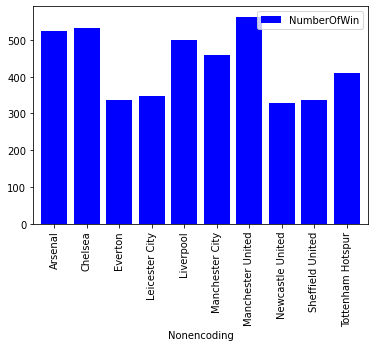

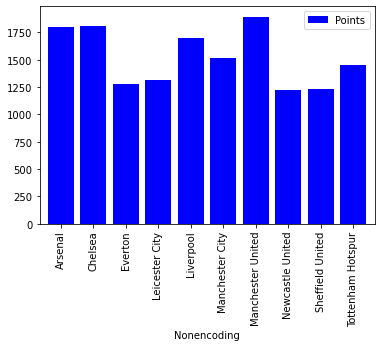

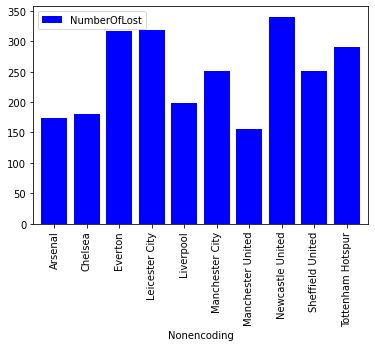

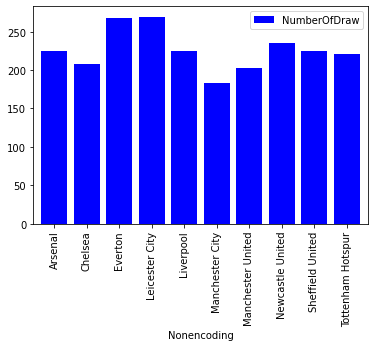

In [674]:
dfa = (df10[['NumberOfWin']].groupby(['Nonencoding']).sum()/2)
dfa.plot.bar(color='blue',width=0.8)
dfa1 = (df10[['Points']].groupby(['Nonencoding']).sum()/2)
dfa1.plot.bar(color='blue',width=0.8)
dfa2 = (df10[['NumberOfLost']].groupby(['Nonencoding']).sum()/2)
dfa2.plot.bar(color='blue',width=0.8)
dfa3 = (df10[['NumberOfDraw']].groupby(['Nonencoding']).sum()/2)
dfa3.plot.bar(color='blue',width=0.8)

# Machine Learning Model
***Train Test Split***

In [675]:
X = df [['NumberOfWin', 'NumberOfDraw', 'NumberOfLost', 'Points']]
y = df["Rank"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_current = df_test[['NumberOfWin', 'NumberOfDraw', 'NumberOfLost', 'Points']]

***Decision Tree Algorithm***

In [676]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Scores
***Accuracy Test***

In [677]:
test_accuracy = dt.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.3804930332261522


***Confusion Matrix***

In [678]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10 23  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  8 27  7  2  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  6 24  5  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  6 15  9 11  2  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  1  6  5 15  3  2  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  3 15 12  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1  6  7 13  4  2  3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  9 23  3  3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  6  6  8  7  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  3  1 10  9  6  4  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  3  5  8  9  5  3  2  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  2  6  7 12  9  3  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

***Classification Report***

In [679]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.82      0.67      0.74        55
           2       0.52      0.51      0.52        45
           3       0.53      0.53      0.53        51
           4       0.55      0.39      0.46        61
           5       0.18      0.36      0.24        25
           6       0.41      0.29      0.34        52
           7       0.26      0.36      0.30        33
           8       0.33      0.28      0.30        47
           9       0.55      0.53      0.54        43
          10       0.23      0.25      0.24        32
          11       0.22      0.20      0.21        45
          12       0.23      0.24      0.23        37
          13       0.27      0.30      0.29        40
          14       0.32      0.20      0.25        49
          15       0.28      0.33      0.30        36
          16       0.32      0.34      0.33        35
          17       0.31      0.32      0.32        37
          18       0.26    

***Validation Accuracy***

[0.25937835 0.22722401 0.27545552 0.22854077 0.25751073]


Text(0.5, 1.0, 'Validation Accuracy')

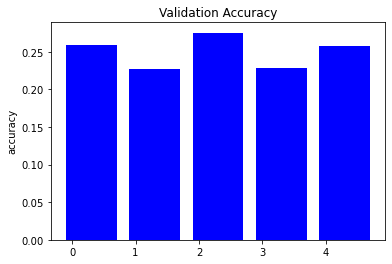

In [680]:
from sklearn.model_selection import cross_val_score
X =df[['NumberOfWin', 'NumberOfDraw', 'NumberOfLost', 'Points']]
scores = cross_val_score(estimator=dt, X=X, y=y, cv = 5, n_jobs = 4)
index = np.arange(5) + 0.3
print(scores)
plt.bar(index, scores)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

# Predicted rank vs Real rank

In [684]:
y_pred_current = dt.predict(X_current)       
df_test['Prediction Rank'] = y_pred_current  
df_test.head(20)                             

,TeamName,NumberofMatches,NumberOfWin,NumberOfDraw,NumberOfLost,Points,Rank,Prediction Rank
0,Manchester City,38,27,5,6,86,1,1
1,Manchester United,38,21,11,6,74,2,4
2,Liverpool,38,20,9,9,69,3,3
3,Chelsea,38,19,10,9,67,4,4
4,Leicester City,38,20,6,12,66,5,4
5,West Ham United,38,19,8,11,65,6,5
6,Tottenham Hotspur,38,18,8,12,62,7,5
7,Arsenal,38,18,7,13,61,8,4
8,Leeds United,38,18,5,15,59,9,7
9,Everton,38,17,8,13,59,10,5
